In [4]:
# import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install sklearn

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [5]:
dataset = pd.read_csv("dataset.csv")
# dataset.head()
dataset.columns[0]

'word_freq_make'

#NOT SPAM:  2788
#SPAM:  1813


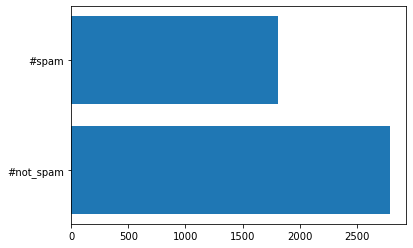

In [6]:
not_spam_count, spam_count = dataset['label_spam'].value_counts()
plt.barh(["#not_spam","#spam"], [not_spam_count, spam_count])
print("#NOT SPAM:  "+str(not_spam_count))
print("#SPAM:  "+ str(spam_count))

#NOT SPAM:  1813
#SPAM:  1813


<BarContainer object of 2 artists>

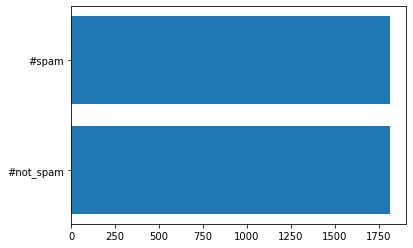

In [7]:
#Solving unbalanced dataset 
#1 undersampling

df_majority_US = dataset[dataset.label_spam == 0]
df_minority_US = dataset[dataset.label_spam == 1]

df_majority_undersampled = resample(df_majority_US, replace = False, n_samples = 1813, random_state = 123)
df_undersampled = pd.concat([df_majority_undersampled, df_minority_US])
undersampled_not_spam, undersampled_spam = df_undersampled .label_spam.value_counts()
print("#NOT SPAM:  "+str(undersampled_not_spam))
print("#SPAM:  "+ str(undersampled_spam))
plt.barh(["#not_spam","#spam"], [undersampled_not_spam, undersampled_spam])

#NOT SPAM:  2788
#SPAM:  2788


<BarContainer object of 2 artists>

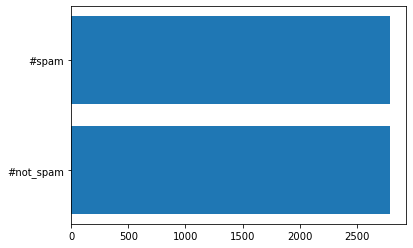

In [8]:
#2 oversampling
df_majority_OS = dataset[dataset.label_spam==0]
df_minority_OS = dataset[dataset.label_spam==1]
df_minority_upsampled = resample(df_minority_OS, 
                                 replace=True,     # sample with replacement
                                 n_samples=2788,    # to match majority class
                                 random_state=123)
df_upsampled = pd.concat([df_majority_OS, df_minority_upsampled])
oversampled_not_spam, oversampled_spam = df_upsampled.label_spam.value_counts()
print("#NOT SPAM:  "+str(oversampled_not_spam))
print("#SPAM:  "+ str(oversampled_spam))
plt.barh(["#not_spam","#spam"], [oversampled_not_spam, oversampled_spam])

In [9]:
X = df_undersampled.drop("label_spam",axis = 1).values
y = df_undersampled["label_spam"].values

In [10]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [11]:
logistic_regression_model = LogisticRegression(max_iter = 3000)
logistic_regression_model.fit(X_train,y_train)
prediction = logistic_regression_model.predict(X_test)

In [12]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy = accuracy_score(y_test,prediction)*100
f1 = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

In [13]:
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  92.01101928374655
F1 Score:  0.9171428571428571
Precision:  0.9277456647398844
Recall:  0.9067796610169492
Specificity:  0.9327956989247311
Sensitivity:  0.9067796610169492
True positive:  321
False positive:  25
True negative:  347
False negative:  33


In [18]:
#gradient boost
kf = KFold(n_splits=5,random_state = 42, shuffle = True)

for train_index,test_index in kf.split(X):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
params = gradient_booster.get_params()


In [19]:
gradient_booster.fit(X_train,y_train)
prediction=gradient_booster.predict(X_test)

In [20]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy = accuracy_score(y_test,prediction)*100
f1 = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

In [21]:
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  96.13793103448276
F1 Score:  0.9612188365650969
Precision:  0.9719887955182073
Recall:  0.9506849315068493
Specificity:  0.9722222222222222
Sensitivity:  0.9506849315068493
True positive:  347
False positive:  10
True negative:  350
False negative:  18


In [22]:
#NaiveBayes
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 70)

In [23]:
model = MultinomialNB()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [24]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy = accuracy_score(y_test,prediction)*100
f1 = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

In [25]:
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  79.88980716253444
F1 Score:  0.7988980716253443
Precision:  0.7795698924731183
Recall:  0.8192090395480226
Specificity:  0.7795698924731183
Sensitivity:  0.8192090395480226
True positive:  145
False positive:  41
True negative:  145
False negative:  32


In [26]:
#random forest
random_forest = RandomForestClassifier(max_depth=25, random_state=0)
random_forest.fit(X_train,y_train)
prediction = random_forest.predict(X_test)

In [27]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy = accuracy_score(y_test,prediction)*100
f1 = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

In [28]:
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  96.69421487603306
F1 Score:  0.9661016949152542
Precision:  0.9661016949152542
Recall:  0.9661016949152542
Specificity:  0.967741935483871
Sensitivity:  0.9661016949152542
True positive:  171
False positive:  6
True negative:  180
False negative:  6


In [37]:
#knn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
prediction = classifier.predict(X_test)

In [38]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy = accuracy_score(y_test,prediction)*100
f1 = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

In [39]:
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  90.22038567493112
F1 Score:  0.8954344624447718
Precision:  0.9074626865671642
Recall:  0.8837209302325582
Specificity:  0.918848167539267
Sensitivity:  0.8837209302325582
True positive:  304
False positive:  31
True negative:  351
False negative:  40
